# Проект №1

# Выявить закономерности определяющие успешность игры по заказу интернет-магазина «Стримчик»

**Описание проекта:** Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования:** Нужно выявить определяющие успешность игры закономерности, так как это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования:** 
<ol><li>Откройте файл с данными и изучите общую информацию
</li><li>Подготовьте данные
</li><li>Проведите исследовательский анализ данных
</li><li>Составьте портрет пользователя каждого региона
</li><li>Проверьте гипотезы
</li><li>Напишите общий вывод
</li></ol>

### Откройте файл с данными и изучите общую информацию

In [1]:
# Импортируем необходимые для исследования библиотеки
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [2]:
# прочитаем файл в датафрейм games
games = pd.read_csv('/datasets/games.csv')

In [3]:
# посмотрим содержимое первых 5 строк
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# методом info() получим сводную информацию о фрейме данных
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#проверим на явные дубликаты
games.duplicated().sum()

0

In [6]:
#Сделаем проверку на наличие неявных дубликатов строк, совпадающих по названию, платформе и году релиза одновременно
print(games[games.duplicated(['Name', 'Platform', 'Year_of_Release'])].count())
games[games.duplicated(['Name', 'Platform', 'Year_of_Release'])]

Name               1
Platform           2
Year_of_Release    2
Genre              1
NA_sales           2
EU_sales           2
JP_sales           2
Other_sales        2
Critic_Score       1
User_Score         1
Rating             1
dtype: int64


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [7]:
#Дубликаты найдены, удалим их
games = games.drop_duplicates(['Name', 'Platform', 'Year_of_Release'])
games[games.duplicated(['Name', 'Platform', 'Year_of_Release'])].count()

Name               0
Platform           0
Year_of_Release    0
Genre              0
NA_sales           0
EU_sales           0
JP_sales           0
Other_sales        0
Critic_Score       0
User_Score         0
Rating             0
dtype: int64

**Вывод** <br>В датасете *games* 16715 строк, явных дубликатов нет, надо заменить названия столбцов на нижний регистр, имеются пропуски в датафрейме в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score and Rating, нужно преобразовать тип данных столбца Year_of_Release в datetime64, а User_Score в float64, нужно проверить столбцы Platform, Genre на уникальность. <br> Данные признаны достаточными для исследования.

### Подготовьте данные
#### Замените названия столбцов (приведите к нижнему регистру);

In [8]:
games.columns = games.columns.str.lower()
#['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 
#                 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

#### Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать

##### посмотрим на пропуски в столбце name

In [9]:
games.loc[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


In [10]:
# посмотрим названия игр на платформе GEN выпущеные в 1993 году
games.loc[(games['platform']=='GEN') & (games['year_of_release']==1993)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN


По имеющимся в стоках с данными нет возможности восстановить название игр, так же для этих строк неизвестен жанр, оценки и рейтинг, принимаем решение удалить эти две строки

In [11]:
games = games.dropna(subset=['name'])
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

##### посмотрим уникальные значения столбца platform

In [12]:
games['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

переименуем в понятные читаемые имена

In [13]:
dic = {'2600':'Atari 2600',
       '3DO':'Panasonic 3DO',
       '3DS':'Nintendo 3DS',
       'DC':'Dendy Classic',
       'DS':'Nintendo DS',
       'GB':'GB-60',
       'GBA':'Game Boy Advance',
       'GC':'Nintendo GameCube',
       'GEN':'SEGA Retro Genesis',
       'GG':'Game Gear',
       'N64':'Nintendo 64',
       'NES':'Nintendo NES',
       'NG':'Neo-Geo',
       'PC':'PC',
       'PCFX':'NEC PC-FX',
       'PS':'PlayStation',
       'PS2':'PlayStation 2',
       'PS3':'PlayStation 3',
       'PS4':'PlayStation 4',
       'PSP':'PlayStation Portable',
       'PSV':'PS Vita',
       'SAT':'Sega Saturn',
       'SCD':'Sega CD',
       'SNES':'Nintendo SNES',
       'TG16':'NEC TurboGrafx',
       'WS':'WonderSwan',
       'Wii':'Nintendo Wii',
       'WiiU':'Nintendo Wii U',
       'X360':'Xbox 360',
       'XB':'Xbox',
       'XOne':'Xbox One'}
games['platform'] = games['platform'].replace(dic)
games['platform'].sort_values().unique()

array(['Atari 2600', 'Dendy Classic', 'GB-60', 'Game Boy Advance',
       'Game Gear', 'NEC PC-FX', 'NEC TurboGrafx', 'Neo-Geo',
       'Nintendo 3DS', 'Nintendo 64', 'Nintendo DS', 'Nintendo GameCube',
       'Nintendo NES', 'Nintendo SNES', 'Nintendo Wii', 'Nintendo Wii U',
       'PC', 'PS Vita', 'Panasonic 3DO', 'PlayStation', 'PlayStation 2',
       'PlayStation 3', 'PlayStation 4', 'PlayStation Portable',
       'SEGA Retro Genesis', 'Sega CD', 'Sega Saturn', 'WonderSwan',
       'Xbox', 'Xbox 360', 'Xbox One'], dtype=object)

##### найдем процент пропусков для столбца year_of_release

In [14]:
(games['year_of_release'].isnull().sum() / len(games['name'])*100).round(2)

1.61

In [15]:
# код ревьюера 
games['year_of_release'].isna().mean()*100

1.6096218286261368

процент пропуска близок 1% и если эти данные будут удалены, то не приведет к существенным потерям данных пригодных для анализа

In [16]:
games = games.dropna(subset=['year_of_release'])
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

##### посмотрим на столбец genre

In [17]:
games['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

##### рассмотрим подробнее пропуски столбца critic_score

In [18]:
print((games['critic_score'].isnull().sum() / len(games['name'])*100).round(2))
games['critic_score'].sort_values().unique()

51.46


array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

пропусков более 50%, удалять нельзя, но можно заменить пустые значения на -1, так как минимальная оценка критиков 13

In [19]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['critic_score'].sort_values().unique()

array([-1., 13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98.])

##### рассмотрим подробнее пропуски столбца user_score

In [20]:
print((games['user_score'].isnull().sum() / len(games['name'])*100).round(2))
games['user_score'].sort_values().unique()

40.17


array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

пропусков более 40%, удалять нельзя, но можно заменить пустые значения на -1, так как оценки пользователей в диапазоне 0-10

In [21]:
games['user_score'] = games['user_score'].fillna('-1')
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

##### рассмотрим подробнее пропуски столбца rating

In [22]:
print((games['rating'].isnull().sum() / len(games['name'])*100).round(2))
games['rating'].sort_values().unique()

40.6


array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

пропусков более 40%, удалять нельзя, но можно заменить пустые значения на undefined

In [23]:
games['rating'] = games['rating'].fillna('undefined')
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

пропуски успешно удалены или заменены на подходящие ситуации значения

#### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

##### преобразуем столбец year_of_release в тип данных int, так как это год релиза

In [24]:
games['year_of_release'] = (games['year_of_release']).astype(int)
games['year_of_release'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64

##### Преобразуем тип данных столбца user_score в float64, так как это оценка пользователей выраженная цислом от 0 до 10. Значение tbd заменим на -1, так же как выше сделали для пустых значений, так как аббервиатура "tbd" означает, что игра еще не оценена достаточным количеством пользователей. Расшифровывается с ангилийского "to be defined".

In [25]:
games['user_score'] = games['user_score'].replace('tbd', '-1')
games['user_score'] = games['user_score'].astype('float')
games['user_score'].sort_values().unique()

array([-1. ,  0. ,  0.2,  0.3,  0.5,  0.6,  0.7,  0.9,  1. ,  1.1,  1.2,
        1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,
        2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,
        3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,
        4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,
        5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,
        6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,
        7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,
        9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7])

##### Столбец Rating содержит значения  "E" и "K-A", которые обозначают один тот же рейтиг, см. инфо https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board. Заменим старое значение "K-A" на "E".

In [26]:
games['rating'] = games['rating'].replace('K-A', 'E')
games['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'M', 'RP', 'T', 'undefined'], dtype=object)

In [27]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [28]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Nintendo Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,Nintendo NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,undefined,40.24
2,Mario Kart Wii,Nintendo Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Nintendo Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB-60,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,undefined,31.38


**Вывод** <br>
<ol><li>Произведена замена замена имен столбцов в нижний регистр
</li><li>Обработаны пропуски в данных и данные преобразованы в нужные типы
<ul><li>столбец name удалены данные для двух строк с пустыми значениями, т.к. нет возможности восстановить на основе анализа 
</li><li>столбец platform произведена замена на удобно читаемые имена, инфо было получено с сайта <a href="https://en.wikipedia.org/wiki/List_of_Interplay_games">https://en.wikipedia.org/wiki/List_of_Interplay_games</a>
</li><li>столбец year_of_release преобразован в тип данных integer, так как это год релиза, удалены строки с пустыми значениями так как процент пропуска близок 1% и если эти данные будут удалены, то не приведет к существенным потерям данных пригодных для анализа
</li><li>столбец critic_score пропусков более 50%, удалять нельзя, но можно заменить пустые значения на -1, так как минимальная оценка критиков 13
</li><li>столбец user_score пропусков более 40%, удалять нельзя, но можно заменить пустые значения на -1, так как оценки пользователей в диапазоне 0-10
</li><li>столбец rating пропусков более 40%, удалять нельзя, но можно заменить пустые значения на undefined. Так же содержит значения "E" и "K-A", которые обозначают один тот же рейтиг, см. инфо https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board. Заменено старое значение "K-A" на "E".
</li></ul>
</li><li>Посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец total_sales.
</li></ol>

### Проведите исследовательский анализ данных

#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [29]:
games_yr_pt = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_yr_pt.columns = ['Количество']
games_yr_pt['Количество %'] = (games_yr_pt['Количество'] / games_yr_pt['Количество'].sum()).map('{:.2%}'.format)
games_yr_pt.sort_values(by='Количество', ascending=False).head()

,Количество,Количество %
year_of_release,,
2008,1427,8.68%
2009,1426,8.67%
2010,1255,7.63%
2007,1197,7.28%
2011,1136,6.91%


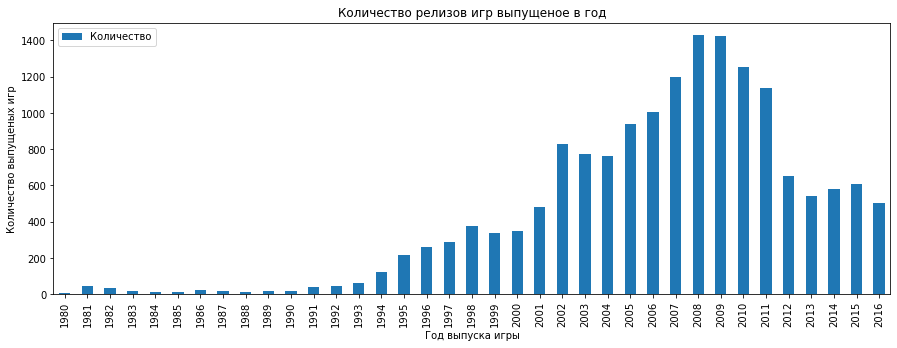

In [30]:
games_yr_pt.plot(kind='bar', figsize=( 15, 5))
plt.ylabel('Количество выпущеных игр')
plt.xlabel('Год выпуска игры')
plt.legend(loc='upper left')
plt.title('Количество релизов игр выпущеное в год')
plt.show()

**Вывод** начиная с 1980 года количество релизов игр неуклонно росло с небольшим спадом в 2003 и 2004 годах до 2008 года после чего начало снижаться. Видимо это связано с тем что вначале рынок рос с приходом новых игроков. а потом начался спад посмкольку игры становились все более требовательны к ресурсам, как финансовым, так и к железу и только крупным и удачливым игрокам рынка удалось продолжить выпуск новых релизов игр. Для исследования предлагается использовать начиная с 2012 года, так как похоже рынок стабилизировался и количество новых релизов примерно одинаковое. Так же на рынок видеоигр имеет особенность на котором сегодня выпущеная игра быстро устаревает из-за постоянно меняющихся технологоий и покупки игры на максимальном уровне ближе всего к ее выпуску ее релиза, далее пользователи как правило переключаются на более новые.

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [31]:
games_plat_pt = games.pivot_table(index=['platform'], values='total_sales', aggfunc='sum')
games_plat_pt.columns = ['Сумма']
games_plat_pt['Сумма %'] = (games_plat_pt['Сумма'] / games_plat_pt['Сумма'].sum()).map('{:.2%}'.format)
games_plat_pt.sort_values(by='Сумма', ascending=False).head(10)

,Сумма,Сумма %
platform,,
PlayStation 2,1233.56,13.99%
Xbox 360,961.24,10.91%
PlayStation 3,931.33,10.57%
Nintendo Wii,891.18,10.11%
Nintendo DS,802.78,9.11%
PlayStation,727.58,8.25%
PlayStation 4,314.14,3.56%
Game Boy Advance,312.88,3.55%
PlayStation Portable,289.53,3.28%


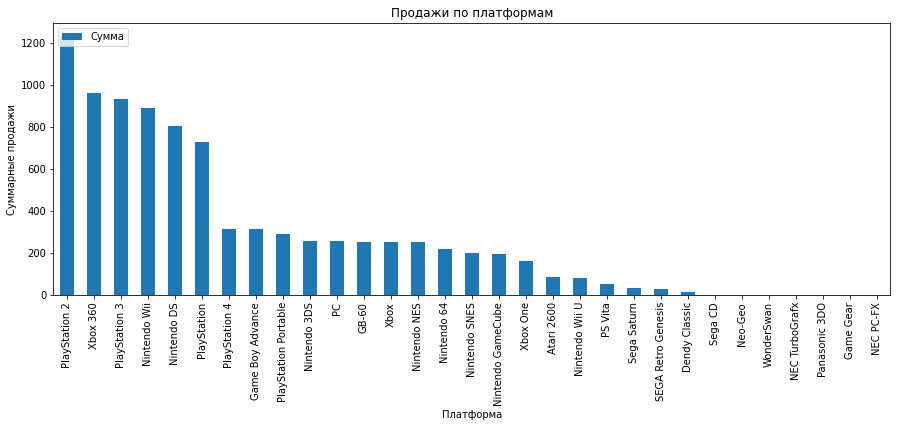

In [32]:
games_plat_pt.sort_values(by='Сумма', ascending=False).plot(kind='bar', figsize=( 15, 5))
plt.ylabel('Суммарные продажи')
plt.xlabel('Платформа')
plt.legend(loc='upper left')
plt.title('Продажи по платформам')
plt.show()

Выберем 6 первых по продажам платформ для дальнейшего изучения по годам, так как далее идет значительный скачок почти на 5%

In [33]:
platform_list = games_plat_pt.sort_values(by='Сумма', ascending=False).reset_index().head(6)['platform'].sort_values().tolist()
platform_list

['Nintendo DS',
 'Nintendo Wii',
 'PlayStation',
 'PlayStation 2',
 'PlayStation 3',
 'Xbox 360']

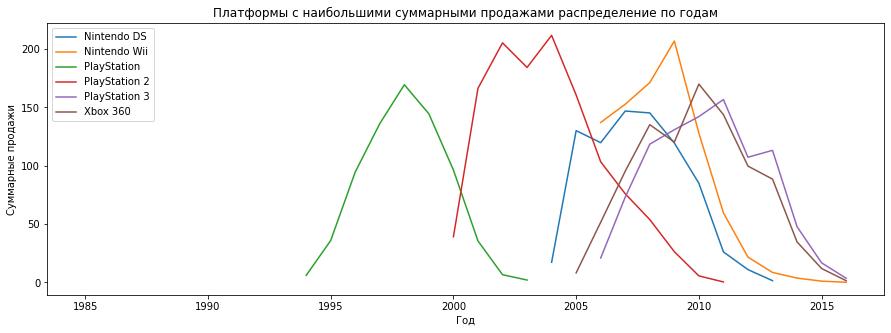

In [34]:
games_top_plat_pt = games.loc[games['platform'].isin(platform_list)]\
.pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum')
games_top_plat_pt.plot(kind='line', figsize=( 15, 5))
plt.ylabel('Суммарные продажи')
plt.xlabel('Год')
plt.legend(loc='upper left')
plt.title('Платформы с наибольшими суммарными продажами распределение по годам')
plt.show()

In [35]:
games_top_plat_pt

platform,Nintendo DS,Nintendo Wii,PlayStation,PlayStation 2,PlayStation 3,Xbox 360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,6.03,NaN,NaN,NaN
1995,NaN,NaN,35.96,NaN,NaN,NaN
1996,NaN,NaN,94.70,NaN,NaN,NaN
1997,NaN,NaN,136.17,NaN,NaN,NaN
1998,NaN,NaN,169.49,NaN,NaN,NaN
1999,NaN,NaN,144.53,NaN,NaN,NaN
2000,NaN,NaN,96.37,39.17,NaN,NaN
2001,NaN,NaN,35.59,166.43,NaN,NaN


виден какой-то сбой для 1985 года, удалим его

In [36]:
games = games.drop(index =games[(games['year_of_release'] == 1985) & (games['platform'].isin(platform_list))].index)

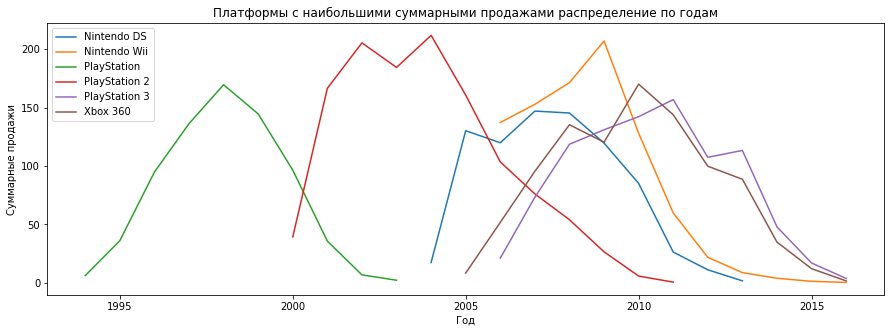

In [37]:
games_top_plat_pt = games.loc[games['platform'].isin(platform_list)]\
.pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum')
games_top_plat_pt.plot(kind='line', figsize=( 15, 5))
plt.ylabel('Суммарные продажи')
plt.xlabel('Год')
plt.legend(loc='upper left')
plt.title('Платформы с наибольшими суммарными продажами распределение по годам')
plt.show()

Посмотрим на какой характерный срок появляются новые и исчезают старые платформы

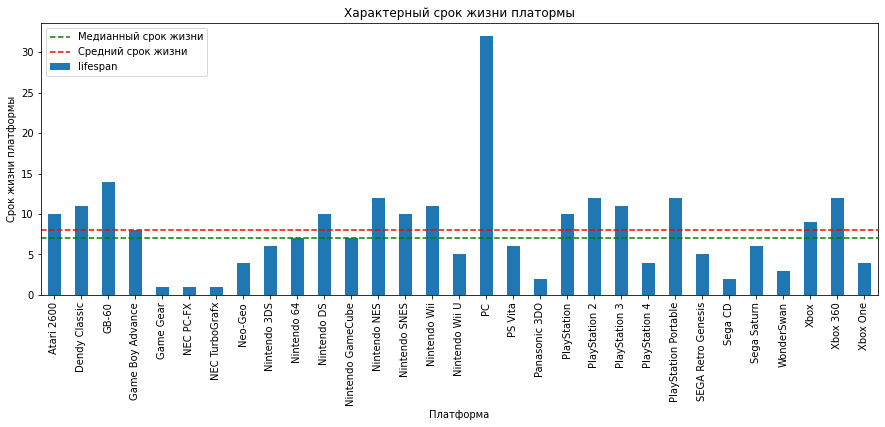

Медианный срок жизни платформы 7.0
Средний срок жизни платформы 8.0


In [38]:
games_life_plat_pt = games.pivot_table(index='platform', values='year_of_release', aggfunc=['min','max'])
games_life_plat_pt['lifespan'] = games_life_plat_pt['max', 'year_of_release'] - games_life_plat_pt['min', 'year_of_release'] + 1
games_life_plat_pt.plot(kind='bar', y='lifespan', figsize=( 15, 5))
plt.axhline(y=games_life_plat_pt['lifespan'].median(), color='green', linestyle='--', label='Медианный срок жизни')
plt.axhline(y=games_life_plat_pt['lifespan'].mean(), color='red', linestyle='--', label='Средний срок жизни')
plt.ylabel('Срок жизни платформы')
plt.xlabel('Платформа')
plt.legend(loc='upper left')
plt.title('Характерный срок жизни платормы')
plt.show()
print('Медианный срок жизни платформы', games_life_plat_pt['lifespan'].median())
print('Средний срок жизни платформы', games_life_plat_pt['lifespan'].mean())

#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

**Вывод** Медианный срок жизни платформы составляет 7 лет, средний - 8, однако продажи растут как правило в первой половине жизненого цикла платформы, поэтому в исследовании нас будет интересовать платформы которые появились не более 4 лет назад.

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [79]:
#создадим датафрейм с актуальными данными
games_a = games.loc[games['year_of_release'] >= 2016-4]
games_a

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PlayStation 3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,Xbox 360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PlayStation 4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,undefined,14.63
33,Pokemon X/Pokemon Y,Nintendo 3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,undefined,14.60
34,Call of Duty: Black Ops II,PlayStation 3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PS Vita,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,undefined,0.01
16707,Aiyoku no Eustia,PS Vita,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,undefined,0.01
16710,Samurai Warriors: Sanada Maru,PlayStation 3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,undefined,0.01
16712,Haitaka no Psychedelica,PS Vita,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,undefined,0.01


In [81]:
# создадим список интересующих нас платформ появившихся не позднее 4 лет назад
platform_list_four_y=games.pivot_table(index='platform', values='year_of_release', aggfunc=['min'])['min', 'year_of_release']
platform_list_four_y = (platform_list_four_y[platform_list_four_y>=2016-4].index.values).tolist()
platform_list_four_y

['Nintendo Wii U', 'PlayStation 4', 'Xbox One']

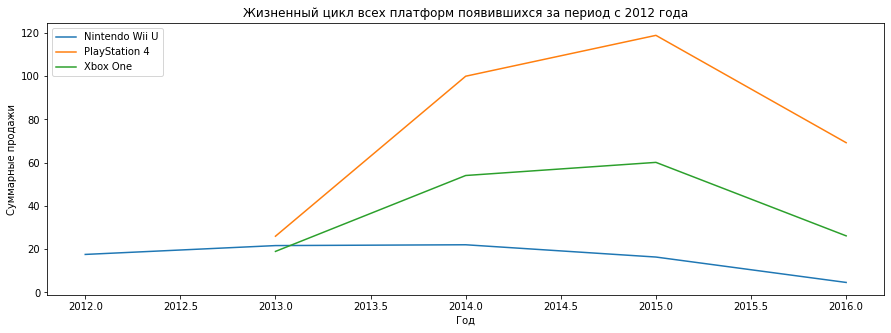

In [82]:
games_list_four_y_pt = games_a.loc[(games_a['platform'].isin(platform_list_four_y))]\
.pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum')
games_list_four_y_pt.plot(kind='line', figsize=( 15, 5))
plt.ylabel('Суммарные продажи')
plt.xlabel('Год')
plt.legend(loc='upper left')
plt.title('Жизненный цикл всех платформ появившихся за период c 2012 года')
plt.show()

In [83]:
games_list_four_y_pt2 = games_a.loc[(games_a['platform'].isin(platform_list_four_y))]\
.pivot_table(index='platform',columns='year_of_release', values='total_sales', aggfunc='sum').reset_index()
games_list_four_y_pt2['total_sales'] = games_list_four_y_pt2[[2012, 2013, 2014, 2015, 2016]].sum(axis = 1)
games_list_four_y_pt2.sort_values(by='total_sales', ascending=False)

year_of_release,platform,2012,2013,2014,2015,2016,total_sales
1,PlayStation 4,NaN,25.99,100.00,118.90,69.25,314.14
2,Xbox One,NaN,18.96,54.07,60.14,26.15,159.32
0,Nintendo Wii U,17.56,21.65,22.03,16.35,4.60,82.19


На графике видно что ни одна из платформ в 2016 году не показала роста продаж. Лидеры PlayStation 4 и Xbox One. Nintendo Wii U хоть и имеет второе место по продажам за период с 2012 года, но на графике видно что продажи падают уже не первый год и платформа явно преодолела половину своего жизненного цикла.

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

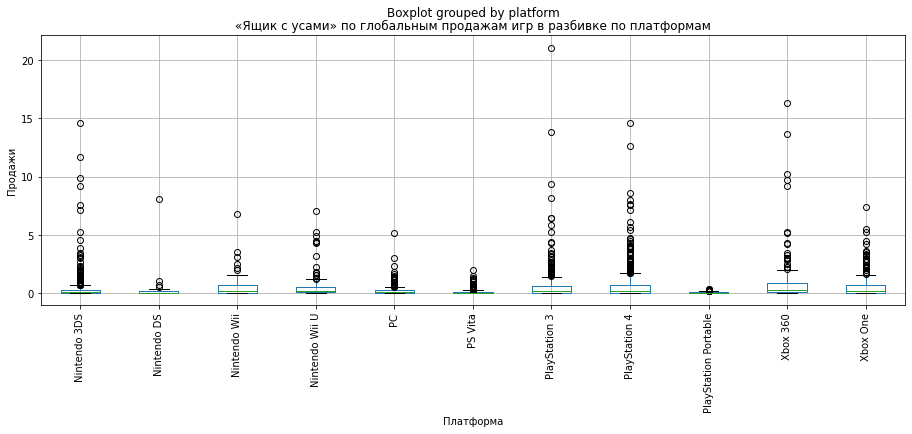

In [93]:
games_a.boxplot(column='total_sales', by='platform', figsize=(15,5))
plt.xticks(rotation = 90)
plt.ylabel('Продажи')
plt.xlabel('Платформа')
plt.title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.show()

выше границы 5 видим редкие выбросы, попробуем ограничить шкалу по этому значению

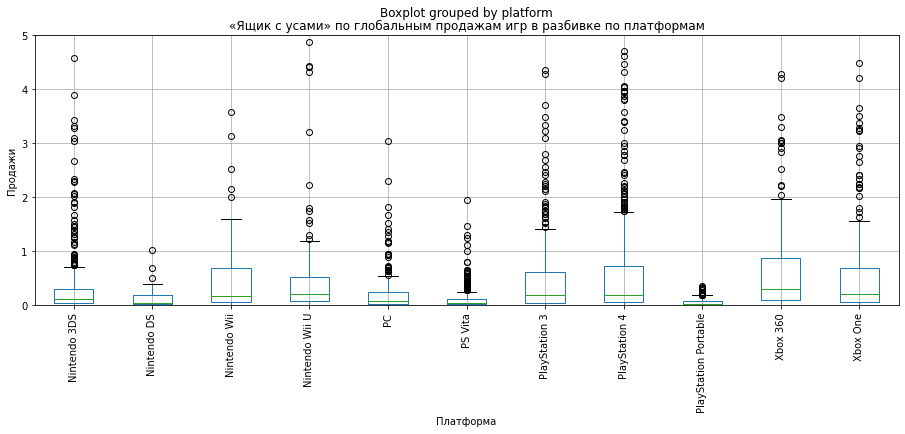

In [91]:
games_a.boxplot(column='total_sales', by='platform', figsize=(15,5))
plt.xticks(rotation = 90)
plt.ylim(0, 5)
plt.ylabel('Продажи')
plt.xlabel('Платформа')
plt.title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.show()

все еще видим очень много выбросов, ограничим до 2

In [86]:
games_a['total_sales'].describe()

count    2885.000000
mean        0.501393
std         1.249340
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total_sales, dtype: float64

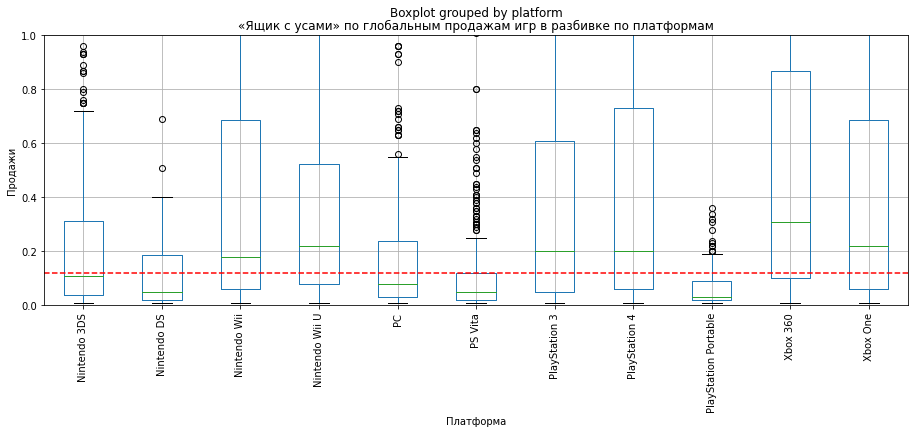

In [92]:
games_a.boxplot(column='total_sales', by='platform', figsize=(15,5))
plt.xticks(rotation = 90)
# найдем медианное значение по выборке и добавим на график
plt.axhline(y=games_a['total_sales'].median(), color='red', linestyle='--')
plt.ylim(0, 1)
plt.ylabel('Продажи')
plt.xlabel('Платформа')
plt.title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.show()

**Вывод** Видим очень большое количество выбросов по всем игровым платформам без исключения. Много платформ имеют медианное значение значительно отличающееся от общего по выборке 

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

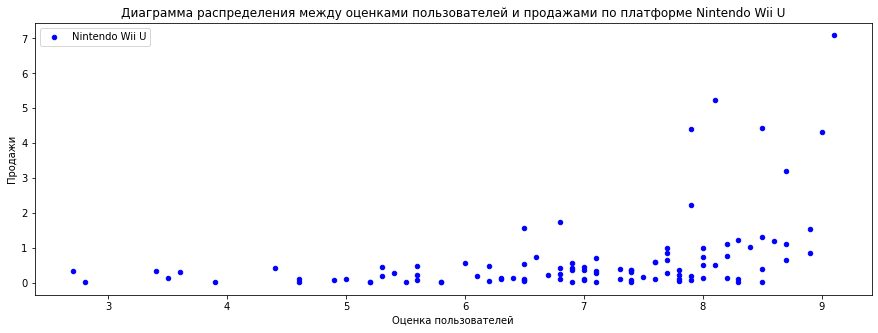

Корреляция между оценками пользователей и продажами по платформе Nintendo Wii U = 0.4002190202148617


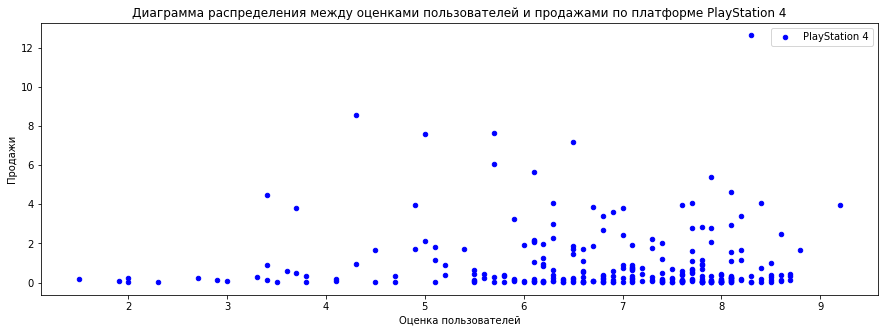

Корреляция между оценками пользователей и продажами по платформе PlayStation 4 = -0.031957110204556376


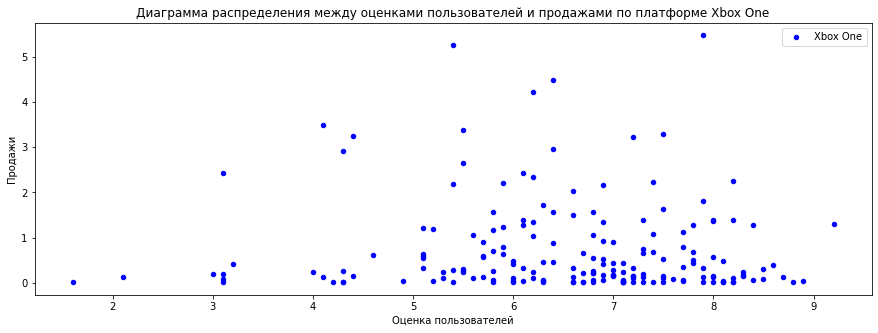

Корреляция между оценками пользователей и продажами по платформе Xbox One = -0.06892505328279414


In [97]:
for plat in platform_list_four_y:
    games_a.loc[(games_a['user_score']>-1)&(games_a['platform']==plat)]\
    .plot(x='user_score', y='total_sales', kind='scatter', figsize=(15, 5), color='b')
    plt.legend([plat])
    plt.title(f'Диаграмма распределения между оценками пользователей и продажами по платформе {plat}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')
    plt.show()
    print(f'Корреляция между оценками пользователей и продажами по платформе {plat} =',
          games_a.loc[(games_a['user_score']>-1)&(games_a['platform']==plat)]['user_score']\
          .corr(games_a.loc[(games_a['user_score']>-1)&(games_a['platform']==plat)]['total_sales']))

**Вывод** Диаграммы распределения показывают на слабую связь между оценкой пользователей и продажами в разрезе отдельных платформ

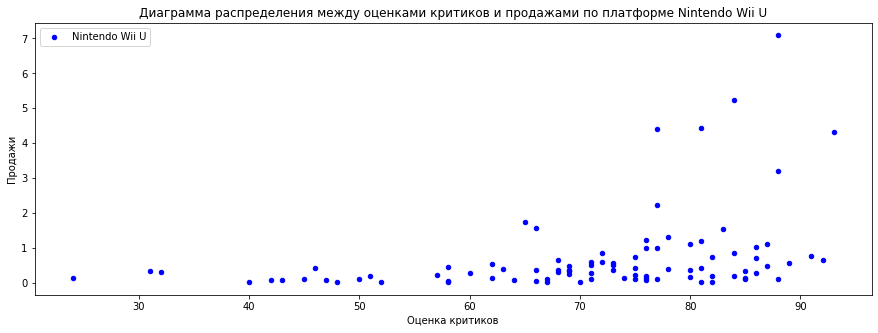

Корреляция между оценками критиков и продажами по платформе Nintendo Wii U = 0.34837976012017485


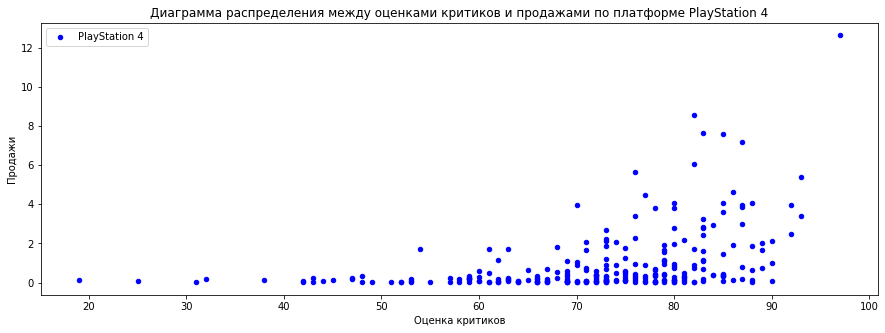

Корреляция между оценками критиков и продажами по платформе PlayStation 4 = 0.40656790206178095


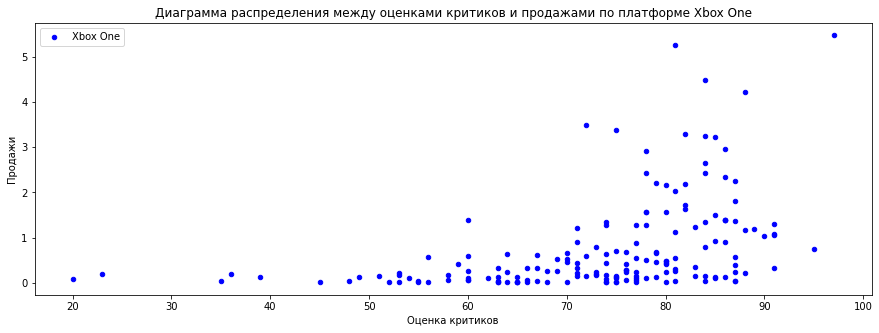

Корреляция между оценками критиков и продажами по платформе Xbox One = 0.4169983280084017


In [96]:
for plat in platform_list_four_y:
    games_a.loc[(games_a['critic_score']>-1)&(games_a['platform']==plat)]\
    .plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15, 5), color='b')
    plt.legend([plat])
    plt.title(f'Диаграмма распределения между оценками критиков и продажами по платформе {plat}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи')
    plt.show()
    print(f'Корреляция между оценками критиков и продажами по платформе {plat} =',
          games_a.loc[(games_a['critic_score']>-1)&(games_a['platform']==plat)]['critic_score']\
          .corr(games_a.loc[(games_a['critic_score']>-1)&(games_a['platform']==plat)]['total_sales']))

**Вывод** Диаграммы распределения показывают на более уверенную связь между оценкой критиков и продажами в разрезе отдельных платформ

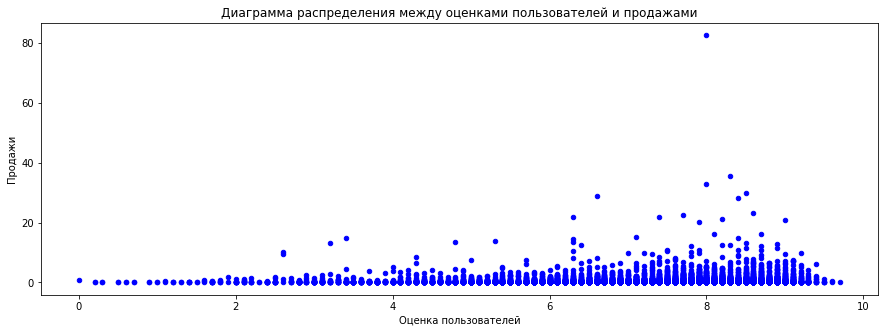

Корреляция между оценками пользователей и продажами = 0.08793539402135664


In [101]:
games.loc[(games['user_score']>-1)]\
.plot(x='user_score', y='total_sales', kind='scatter', figsize=(15, 5), color='b')
plt.title('Диаграмма распределения между оценками пользователей и продажами')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()
print(f'Корреляция между оценками пользователей и продажами =',
          games.loc[(games['user_score']>-1)]['user_score']\
          .corr(games.loc[(games['user_score']>-1)]['total_sales']))

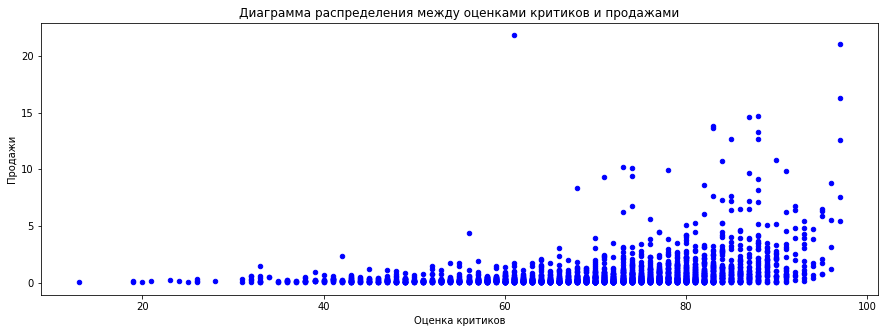

Корреляция между оценками критиков и продажами = 0.13460510732854777


In [100]:
games.loc[(games['year_of_release'] >= 2010)&(games['critic_score']>-1)]\
.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15, 5), color='b')
plt.title('Диаграмма распределения между оценками критиков и продажами')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()
print(f'Корреляция между оценками критиков и продажами =',
          games.loc[(games['critic_score']>-1)]['user_score']\
          .corr(games.loc[(games['critic_score']>-1)]['total_sales']))

**Вывод** корреляция в общем случае практически отсутсвует и для пользовательских оценок и для критиков

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

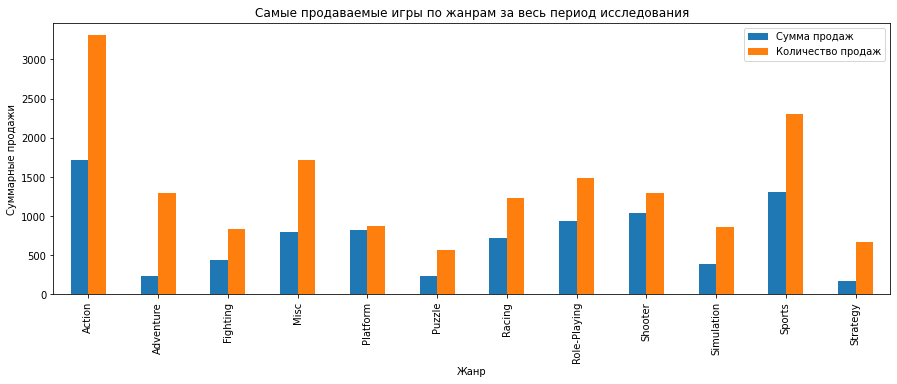

In [102]:
games.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count']).plot(kind='bar', figsize=( 15, 5))
plt.ylabel('Суммарные продажи')
plt.xlabel('Жанр')
plt.legend(['Сумма продаж','Количество продаж'], loc='upper right')
plt.title('Самые продаваемые игры по жанрам за весь период исследования')
plt.show()

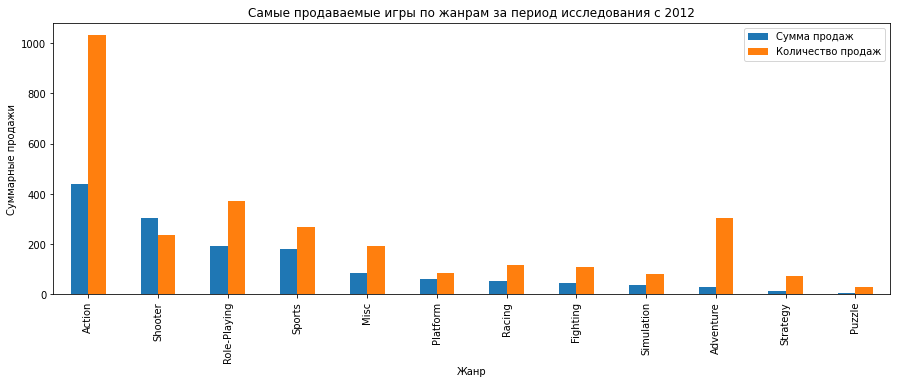

In [103]:
pt=games_a.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count']).reset_index()
pt.columns = ['genre','sum','count']
pt.sort_values(by='sum', ascending=False)\
.plot(kind='bar', x='genre', figsize=( 15, 5))
plt.ylabel('Суммарные продажи')
plt.xlabel('Жанр')
plt.legend(['Сумма продаж','Количество продаж', 'Медианное значение'], loc='upper right')
plt.title('Самые продаваемые игры по жанрам за период исследования с 2012')
plt.show()

In [104]:
pt=games_a.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count', 'median']).reset_index()
pt.columns = ['genre','sum','count','median']
pt.sort_values(by='median', ascending=False)

,genre,sum,count,median
8,Shooter,304.73,235,0.440
10,Sports,181.06,267,0.240
4,Platform,61.00,85,0.210
7,Role-Playing,192.80,370,0.140
6,Racing,53.50,115,0.140
2,Fighting,44.49,109,0.130
0,Action,441.12,1031,0.120
3,Misc,85.04,192,0.120
9,Simulation,35.12,80,0.120
11,Strategy,13.34,71,0.080


**Вывод** Самые продаваемые игры в жанрах Action и Shooter, но если посмотреть на медианное значение и количество продаж, то становится понятно почему Action заработал больше всего. Shooter самый выгодный жанр как оказалось при дополнительном рассмотрении, имеет второе место по сумме продаж и самое высокое медианное значение.

**Общий вывод**<br>
    <ol><li>начиная с 1980 года количество релизов игр неуклонно росло с небольшим спадом в 2003 и 2004 годах до 2008 года после чего начало снижаться. Видимо это связано с тем что вначале рынок рос с приходом новых игроков. а потом начался спад посмкольку игры становились все более требовательны к ресурсам, как финансовым, так и к железу и только крупным и удачливым игрокам рынка удалось продолжить выпуск новых релизов игр. Для исследования предлагается использовать начиная с 2012 года, так как похоже рынок стабилизировался и количество новых релизов примерно одинаковое. Так же на рынок видеоигр имеет особенность на котором сегодня выпущеная игра быстро устаревает из-за постоянно меняющихся технологоий и покупки игры на максимальном уровне ближе всего к ее выпуску ее релиза, далее пользователи как правило переключаются на более новые.
    </li><li>
    Медианный срок жизни платформы составляет 7 лет, средний - 8, однако продажи растут как правило в первой половине жизненого цикла платформы, поэтому в исследовании нас будет интересовать платформы которые появились не более 4 лет назад.
    </li><li>
     На графике видно что ни одна из платформ в 2016 году не показала роста продаж. Лидеры PlayStation 4 и Xbox One. Nintendo Wii U хоть и имеет второе место по продажам за период с 2012 года, но на графике видно что продажи падают уже не первый год и платформа явно преодолела половину своего жизненного цикла.
    </li><li>
    Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.<br>
        Видим очень большое количество выбросов по всем игровым платформам без исключения. Много платформ имеют медианное значение значительно отличающееся от общего по выборке.
    </li><li>
    Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.<br>
     Корреляция в общем случае практически отсутсвует и для пользовательских оценок и для критиков
    </li><li>
    Самые продаваемые игры в жанрах Action и Shooter, но если посмотреть на медианное значение и количество продаж, то становится понятно почему Action заработал больше всего. Shooter самый выгодный жанр как оказалось при дополнительном рассмотрении, имеет второе место по сумме продаж и самое высокое медианное значение.

### Составьте портрет пользователя каждого региона. Определите для пользователя каждого региона (NA, EU, JP):

#### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

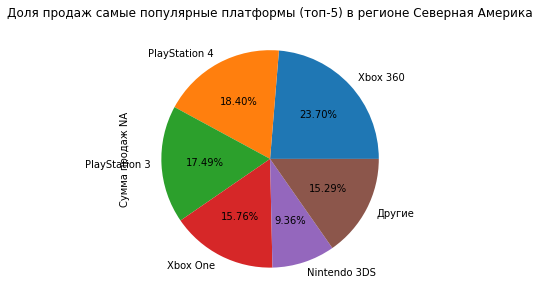

In [140]:
pt=games_a.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
          .sort_values(by='na_sales', ascending=False).reset_index()
pt['%'] = (((pt['na_sales']/pt['na_sales'].sum())*100).round(2))
pt.columns=['Платформа','Сумма продаж NA', 'Доля продаж, %']
pt.loc[5:,'Платформа'] = 'Другие'
pt.loc[5,'Сумма продаж NA'] =  pt.loc[5:,'Сумма продаж NA'].sum()
pt=pt.head(6)
#pt.loc['Total']= pt.sum()
pt.plot(kind='pie', labels=pt['Платформа'], y='Сумма продаж NA', autopct='%1.2f%%', figsize=(5, 5), legend=False)
plt.title(f'Доля продаж самые популярные платформы (топ-5) в регионе Северная Америка')
plt.show()

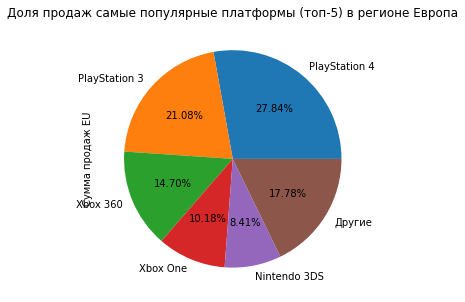

In [141]:
pt=games_a.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False).reset_index()
pt['%'] = (((pt['eu_sales']/pt['eu_sales'].sum())*100).round(2))
pt.columns=['Платформа','Сумма продаж EU', 'Доля продаж, %']
pt.loc[5:,'Платформа'] = 'Другие'
pt.loc[5,'Сумма продаж EU'] =  pt.loc[5:,'Сумма продаж EU'].sum()
pt=pt.head(6)
#pt.loc['Total']= pt.sum()
pt.plot(kind='pie', labels=pt['Платформа'], y='Сумма продаж EU', autopct='%1.2f%%', figsize=(5, 5), legend=False)
plt.title(f'Доля продаж самые популярные платформы (топ-5) в регионе Европа')
plt.show()

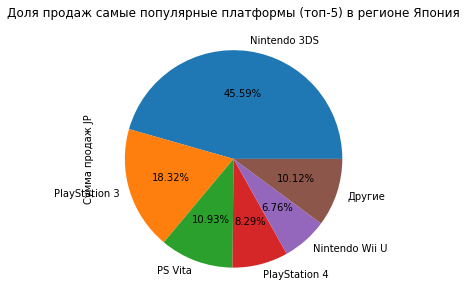

In [142]:
pt=games_a.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False).reset_index()
pt['%'] = (((pt['jp_sales']/pt['jp_sales'].sum())*100).round(2))
pt.columns=['Платформа','Сумма продаж JP', 'Доля продаж, %']
pt.loc[5:,'Платформа'] = 'Другие'
pt.loc[5,'Сумма продаж JP'] =  pt.loc[5:,'Сумма продаж JP'].sum()
pt=pt.head(6)
#pt.loc['Total']= pt.sum()
pt.plot(kind='pie', labels=pt['Платформа'], y='Сумма продаж JP', autopct='%1.2f%%', figsize=(5, 5), legend=False)
plt.title(f'Доля продаж самые популярные платформы (топ-5) в регионе Япония')
plt.show()

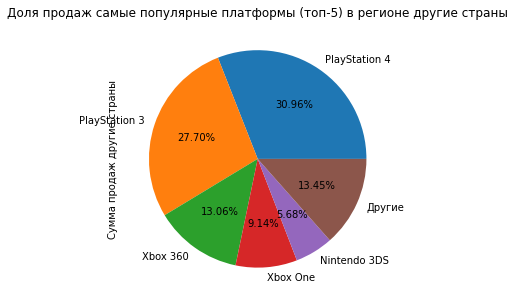

In [143]:
pt=games_a.pivot_table(index='platform', values='other_sales', aggfunc='sum')\
.sort_values(by='other_sales', ascending=False).reset_index()
pt['%'] = (((pt['other_sales']/pt['other_sales'].sum())*100).round(2))
pt.columns=['Платформа','Сумма продаж другие страны', 'Доля продаж, %']
pt.loc[5:,'Платформа'] = 'Другие'
pt.loc[5,'Сумма продаж другие страны'] =  pt.loc[5:,'Сумма продаж другие страны'].sum()
pt=pt.head(6)
#pt.loc['Total']= pt.sum()
pt.plot(kind='pie', labels=pt['Платформа'], y='Сумма продаж другие страны', autopct='%1.2f%%', figsize=(5, 5), legend=False)
plt.title(f'Доля продаж самые популярные платформы (топ-5) в регионе другие страны')
plt.show()

**Вывод** <br>
Первое место у платформ: Северная Америка - Xbox 360 - 23.7%, Европа - PlayStation 3 - 27.84%, Япония - Nintendo 3DS - 45.59%, другие страны - PlayStation 4 - 30.96%. Думаю разница в пятерке лучших связана с тем что в регионе выигрывают локальные платформы Северная Америка - Xbox 360, Япония - Nintendo 3DS.

#### Самые популярные жанры (топ-5). Поясните разницу.

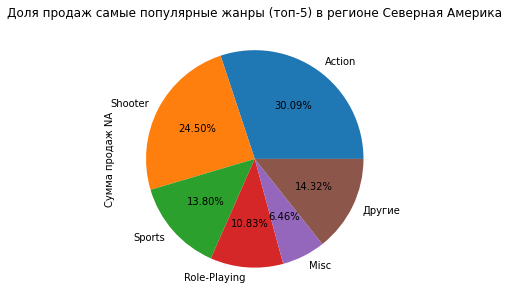

In [150]:
pt=games_a.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False).reset_index()
pt['%'] = (((pt['na_sales']/pt['na_sales'].sum())*100).round(2))
pt.columns=['Жанр','Сумма продаж NA', 'Доля продаж, %']
pt.loc[5:,'Жанр'] = 'Другие'
pt.loc[5,'Сумма продаж NA'] =  pt.loc[5:,'Сумма продаж NA'].sum()
pt=pt.head(6)
#pt.loc['Total']= pt.sum()
pt.plot(kind='pie', labels=pt['Жанр'], y='Сумма продаж NA', autopct='%1.2f%%', figsize=(5, 5), legend=False)
plt.title(f'Доля продаж самые популярные жанры (топ-5) в регионе Северная Америка')
plt.show()

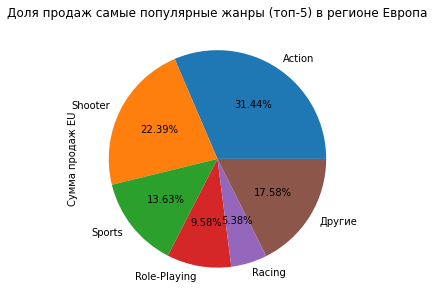

In [151]:
pt=games_a.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False).reset_index()
pt['%'] = (((pt['eu_sales']/pt['eu_sales'].sum())*100).round(2))
pt.columns=['Жанр','Сумма продаж EU', 'Доля продаж, %']
pt.loc[5:,'Жанр'] = 'Другие'
pt.loc[5,'Сумма продаж EU'] =  pt.loc[5:,'Сумма продаж EU'].sum()
pt=pt.head(6)
#pt.loc['Total']= pt.sum()
pt.plot(kind='pie', labels=pt['Жанр'], y='Сумма продаж EU', autopct='%1.2f%%', figsize=(5, 5), legend=False)
plt.title(f'Доля продаж самые популярные жанры (топ-5) в регионе Европа')
plt.show()

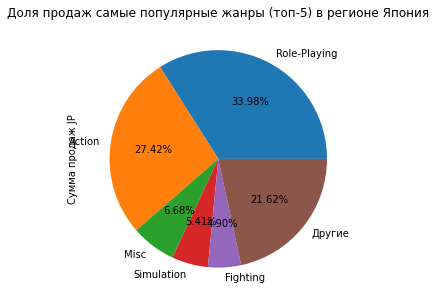

In [152]:
pt=games_a.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False).reset_index()
pt['%'] = (((pt['jp_sales']/pt['jp_sales'].sum())*100).round(2))
pt.columns=['Жанр','Сумма продаж JP', 'Доля продаж, %']
pt.loc[5:,'Жанр'] = 'Другие'
pt.loc[5,'Сумма продаж JP'] =  pt.loc[5:,'Сумма продаж JP'].sum()
pt=pt.head(6)
#pt.loc['Total']= pt.sum()
pt.plot(kind='pie', labels=pt['Жанр'], y='Сумма продаж JP', autopct='%1.2f%%', figsize=(5, 5), legend=False)
plt.title(f'Доля продаж самые популярные жанры (топ-5) в регионе Япония')
plt.show()

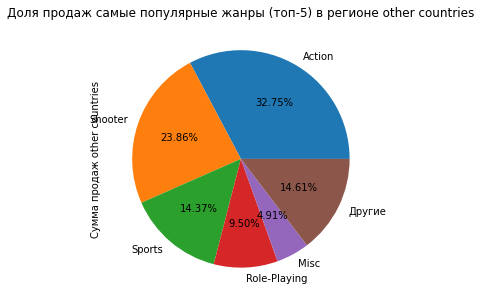

In [153]:
pt=games_a.pivot_table(index='genre', values='other_sales', aggfunc='sum')\
.sort_values(by='other_sales', ascending=False).reset_index()
pt['%'] = (((pt['other_sales']/pt['other_sales'].sum())*100).round(2))
pt.columns=['Жанр','Сумма продаж other countries', 'Доля продаж, %']
pt.loc[5:,'Жанр'] = 'Другие'
pt.loc[5,'Сумма продаж other countries'] =  pt.loc[5:,'Сумма продаж other countries'].sum()
pt=pt.head(6)
#pt.loc['Total']= pt.sum()
pt.plot(kind='pie', labels=pt['Жанр'], y='Сумма продаж other countries', autopct='%1.2f%%', figsize=(5, 5), legend=False)
plt.title(f'Доля продаж самые популярные жанры (топ-5) в регионе other countries')
plt.show()

**Вывод**
Пятерка лучших жанров держит примерно 85% рынка во всех регионах с отличием в Японии с 79%.<br>
Первое место у во всех регионах держит жанр Action, второе Shooter, за исключением Японии, где на первом месте жанр Role-Playing, а на втором снова Action.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

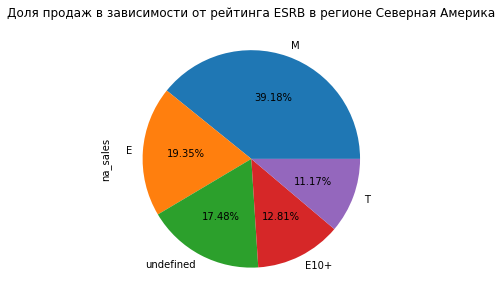

In [156]:
games_a.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)\
.plot(kind='pie', y='na_sales', autopct='%1.2f%%', figsize=(5, 5), legend=False)
plt.title(f'Доля продаж в зависимости от рейтинга ESRB в регионе Северная Америка')
plt.show()

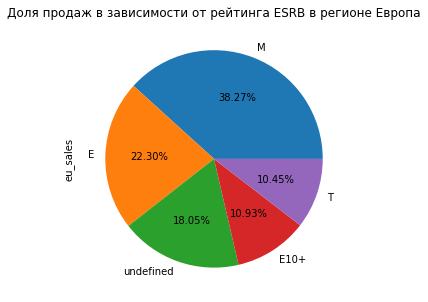

In [157]:
games_a.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)\
.plot(kind='pie', y='eu_sales', autopct='%1.2f%%', figsize=(5, 5), legend=False)
plt.title(f'Доля продаж в зависимости от рейтинга ESRB в регионе Европа')
plt.show()

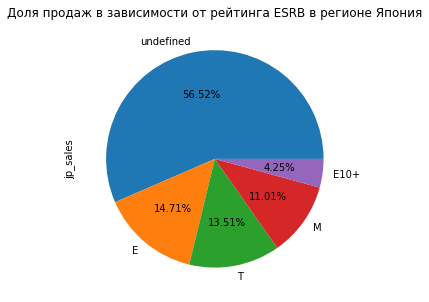

In [158]:
games_a.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)\
.plot(kind='pie', y='jp_sales', autopct='%1.2f%%', figsize=(5, 5), legend=False)
plt.title(f'Доля продаж в зависимости от рейтинга ESRB в регионе Япония')
plt.show()

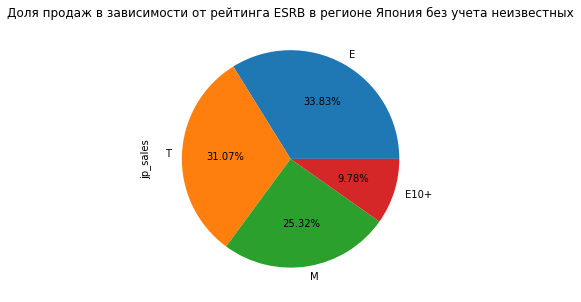

In [159]:
games_a.loc[games['rating'] != 'undefined']\
.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)\
.plot(kind='pie', y='jp_sales', autopct='%1.2f%%', figsize=(5, 5), legend=False)
plt.title(f'Доля продаж в зависимости от рейтинга ESRB в регионе Япония без учета неизвестных')
plt.show()

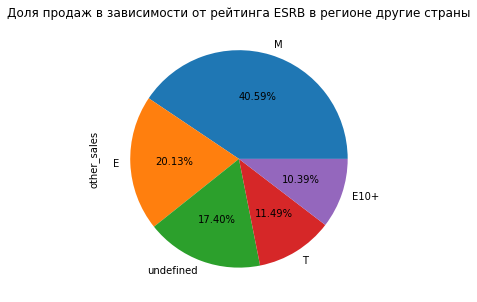

In [160]:
games_a.pivot_table(index='rating', values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False)\
.plot(kind='pie', y='other_sales', autopct='%1.2f%%', figsize=(5, 5), legend=False)
plt.title(f'Доля продаж в зависимости от рейтинга ESRB в регионе другие страны')
plt.show()

**Вывод** Во всех регионах на первом месте рейтинг M, за исключением Японии, по которой не все однозначно, так как на первом месте оказался неопределенный рейтинг и если убрать это, то на первом месте окажется рейтинг E.
Есть различия в процентах, но везде, кроме Японии, в которой имеется своя рейтинговая система на первом месте рейтинг M.

**Общий вывод**<br>
<ol><li>Самые популярные платформы (топ-5). Опишите различия в долях продаж.<br>
    Первое место у платформ: Северная Америка - Xbox 360 - 23.7%, Европа - PlayStation 3 - 27.84%, Япония - Nintendo 3DS - 45.59%, другие страны - PlayStation 4 - 30.96%. Думаю разница в пятерке лучших связана с тем что в регионе выигрывают локальные платформы Северная Америка - Xbox 360, Япония - Nintendo 3DS.
    </li><li>Самые популярные жанры (топ-5). Поясните разницу.<br>
    Пятерка лучших жанров держит примерно 85% рынка во всех регионах с отличием в Японии с 79%.
Первое место у во всех регионах держит жанр Action, второе Shooter, за исключением Японии, где на первом месте жанр Role-Playing, а на втором снова Action.
    </li><li>Влияет ли рейтинг ESRB на продажи в отдельном регионе?<br>
   Во всех регионах на первом месте рейтинг M, за исключением Японии, по которой не все однозначно, так как на первом месте оказался неопределенный рейтинг и если убрать это, то на первом месте окажется рейтинг E.
Есть различия в процентах, но везде, кроме Японии, в которой имеется своя рейтинговая система на первом месте рейтинг M.    
    </li></ol>

### Проверьте гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Пусть гипотеза Н<SUB>0</SUB> - Средние пользовательские рейтинги платформ XOne и PC равны, тогда гипотеза Н<SUB>1</SUB> - Средние пользовательские рейтинги платформ XOne и PC не равны. Для экономических данных обычно выбирается значение alpha равным 5%. Установим его.

In [154]:
alpha = 0.05

results = st.ttest_ind(
    games_a.loc[(games_a['platform']=='Xbox One')&(games_a['user_score']>-1)]['user_score'], 
    games_a.loc[(games_a['platform']=='PC')&(games_a['user_score']>-1)]['user_score'],
    alternative='two-sided') #для проверки на неравенство (в обе стороны)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


**Вывод** Нулевая гипотеза не опровергнута, есть основания утверждать, что пользовательские рейтинги XOne и PC равны

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Будем исходить от противного, и у нас получится задание аналогично предыдущему. Пусть гипотеза H<SUB>0</SUB> - Средние пользовательские рейтинги жанров Action и Sports равны, тогда гипотеза Н<SUB>1</SUB> - Средние пользовательские рейтинги жанров Action и Sports не равны. Для экономических данных обычно выбирается значение alpha равным 5%. Установим его.

In [155]:
alpha = 0.05

results = st.ttest_ind(
    games_a.loc[(games_a['genre'] == 'Action')&(games_a['user_score']>-1)]['user_score'], 
    games_a.loc[(games_a['genre']=='Sports')&(games_a['user_score']>-1)]['user_score'],
    alternative='two-sided') #для проверки на неравенство (в обе стороны)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 4.8045233804629176e-26
Отвергаем нулевую гипотезу


**Вывод** Нулевая гипотеза опровергнута, есть основания утверждать, что пользовательские рейтинги равны исходя и первоначального предположения от противного.

**Нулевая и альтернативная гипотезы**
В первой задаче задаваемый вопрос "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?" полностью совпадает с фольмулировкой нулевой гипотезы H<SUB>0</SUB> - Средние пользовательские рейтинги платформ XOne и PC равны.
Альтернативная гипотеза может быть проверена в трех направлениях "меньше", "не равно", "больше" в нашем случае ставится вопрос про равенство, значит проверку надо провести двухстороннюю alternative='two-sided'<br>
Во второй задаче задаваемый вопрос "Средние пользовательские рейтинги жанров Action и Sports разные?" не может быть проверен прямо, ведь нулевая гипотеза должна быть всегда равна, поэтому выдвинута протвоположная нулевая гипотеза Н<SUB>0</SUB> - Средние пользовательские рейтинги жанров Action и Sports равны, в данном случае если мы отвергнем нулевую гипотезу, значит подтвердим, что рейтинги разные.<br>
Альтернативная гипотеза может быть проверена в трех направлениях "меньше", "не равно", "больше" в нашем случае ставится вопрос про не равенство, значит проверку надо провести двухстороннюю alternative='two-sided'
Из предыдущего анализа выявили, что выборочные средние имеют нормальное распределение, выборки достаточны (>30 наблюдений), что означает требование нормальности исходных значений, следовательно для проверки гипотез можно применить статистические методы анализа и t-критерий Стьюдента.
<br>
Статистические методы Python оперируют с P-value, который означает возможность получить вероятность для данной вероятностной модели распределения значений случайной величины такое же или более экстремальное значение статистики по сравнению с ранее наблюдаемым, при условии, что нулевая гипотеза верна, а практически оперирует площадями под кривой нормального распределения.
<br>
Для подтверждения или опровержения необходимо установить уровень значимости для того или иного сравнения процессов, обычно для экономических данных его устанавливают 5% или 0,05.


**Общий вывод по исследованию**<br>
<ol><li>Загрузка данных<br>
    В датасете games 16715 строк, явных дубликатов нет, надо заменить названия столбцов на нижний регистр, имеются пропуски в датафрейме в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score and Rating, нужно преобразовать тип данных столбца Year_of_Release в datetime64, а User_Score в float64, нужно проверить столбцы Platform, Genre на уникальность.
Данные признаны достаточными для исследования.
    </li><li>
    Подготовьте данные<br>
    <ol><li>Произведена замена замена имен столбцов в нижний регистр
</li><li>Обработаны пропуски в данных и данные преобразованы в нужные типы
<ul><li>столбец name удалены данные для двух строк с пустыми значениями, т.к. нет возможности восстановить на основе анализа 
</li><li>столбец platform произведена замена на удобно читаемые имена, инфо было получено с сайта <a href="https://en.wikipedia.org/wiki/List_of_Interplay_games">https://en.wikipedia.org/wiki/List_of_Interplay_games</a>
</li><li>столбец year_of_release преобразован в тип данных integer, так как это год релиза, удалены строки с пустыми значениями так как процент пропуска близок 1% и если эти данные будут удалены, то не приведет к существенным потерям данных пригодных для анализа
</li><li>столбец critic_score пропусков более 50%, удалять нельзя, но можно заменить пустые значения на -1, так как минимальная оценка критиков 13
</li><li>столбец user_score пропусков более 40%, удалять нельзя, но можно заменить пустые значения на -1, так как оценки пользователей в диапазоне 0-10
</li><li>столбец rating пропусков более 40%, удалять нельзя, но можно заменить пустые значения на undefined. Так же содержит значения "E" и "K-A", которые обозначают один тот же рейтиг, см. инфо https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board. Заменено старое значение "K-A" на "E".
</li></ul>
</li><li>Посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец total_sales.
</li></ol>
    </li><li>
    Проведите исследовательский анализ данных<br>
    <ol><li>начиная с 1980 года количество релизов игр неуклонно росло с небольшим спадом в 2003 и 2004 годах до 2008 года после чего начало снижаться. Видимо это связано с тем что вначале рынок рос с приходом новых игроков. а потом начался спад посмкольку игры становились все более требовательны к ресурсам, как финансовым, так и к железу и только крупным и удачливым игрокам рынка удалось продолжить выпуск новых релизов игр. Для исследования предлагается использовать начиная с 2012 года, так как похоже рынок стабилизировался и количество новых релизов примерно одинаковое. Так же на рынок видеоигр имеет особенность на котором сегодня выпущеная игра быстро устаревает из-за постоянно меняющихся технологоий и покупки игры на максимальном уровне ближе всего к ее выпуску ее релиза, далее пользователи как правило переключаются на более новые.
    </li><li>
    Медианный срок жизни платформы составляет 7 лет, средний - 8, однако продажи растут как правило в первой половине жизненого цикла платформы, поэтому в исследовании нас будет интересовать платформы которые появились не более 4 лет назад.
    </li><li>
     На графике видно что ни одна из платформ в 2016 году не показала роста продаж. Лидеры PlayStation 4 и Xbox One. Nintendo Wii U хоть и имеет второе место по продажам за период с 2012 года, но на графике видно что продажи падают уже не первый год и платформа явно преодолела половину своего жизненного цикла.
    </li><li>
    Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.<br>
        Видим очень большое количество выбросов по всем игровым платформам без исключения. Много платформ имеют медианное значение значительно отличающееся от общего по выборке.
    </li><li>
    Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.<br>
     Корреляция в общем случае практически отсутсвует и для пользовательских оценок и для критиков
    </li><li>
    Самые продаваемые игры в жанрах Action и Shooter, но если посмотреть на медианное значение и количество продаж, то становится понятно почему Action заработал больше всего. Shooter самый выгодный жанр как оказалось при дополнительном рассмотрении, имеет второе место по сумме продаж и самое высокое медианное значение.
    </li></ol>
  </li><li>Составьте портрет пользователя каждого региона. Определите для пользователя каждого региона (NA, EU, JP)<br>
    <ol><li>Самые популярные платформы (топ-5). Опишите различия в долях продаж.<br>
    Первое место у платформ: Северная Америка - Xbox 360 - 23.7%, Европа - PlayStation 3 - 27.84%, Япония - Nintendo 3DS - 45.59%, другие страны - PlayStation 4 - 30.96%. Думаю разница в пятерке лучших связана с тем что в регионе выигрывают локальные платформы Северная Америка - Xbox 360, Япония - Nintendo 3DS.
    </li><li>Самые популярные жанры (топ-5). Поясните разницу.<br>
    Пятерка лучших жанров держит примерно 85% рынка во всех регионах с отличием в Японии с 79%.
Первое место у во всех регионах держит жанр Action, второе Shooter, за исключением Японии, где на первом месте жанр Role-Playing, а на втором снова Action.
    </li><li>Влияет ли рейтинг ESRB на продажи в отдельном регионе?<br>
    Во всех регионах на первом месте рейтинг M, за исключением Японии, по которой не все однозначно, так как на первом месте оказался неопределенный рейтинг и если убрать это, то на первом месте окажется рейтинг E.
Есть различия в процентах, но везде, кроме Японии, в которой имеется своя рейтинговая система на первом месте рейтинг M.    
    </li></ol>
  </li><li>Проверьте гипотезы<br>
    <ol><li>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые<br>
    Нулевая гипотеза не опровергнута, есть основания утверждать, что пользовательские рейтинги XOne и PC равны
    </li><li>Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.<br>
    Нулевая гипотеза опровергнута, есть основания утверждать, что пользовательские рейтинги равны исходя и первоначального предположения от противного.
</li><li>Нулевая и альтернативная гипотезы<br>
В первой задаче задаваемый вопрос "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?" полностью совпадает с фольмулировкой нулевой гипотезы H<SUB>0</SUB> - Средние пользовательские рейтинги платформ XOne и PC равны.
Альтернативная гипотеза может быть проверена в трех направлениях "меньше", "не равно", "больше" в нашем случае ставится вопрос про равенство, значит проверку надо провести двухстороннюю alternative='two-sided'<br>
Во второй задаче задаваемый вопрос "Средние пользовательские рейтинги жанров Action и Sports разные?" не может быть проверен прямо, ведь нулевая гипотеза должна быть всегда равна, поэтому выдвинута протвоположная нулевая гипотеза Н<SUB>0</SUB> - Средние пользовательские рейтинги жанров Action и Sports равны, в данном случае если мы отвергнем нулевую гипотезу, значит подтвердим, что рейтинги разные.<br>
Альтернативная гипотеза может быть проверена в трех направлениях "меньше", "не равно", "больше" в нашем случае ставится вопрос про не равенство, значит проверку надо провести двухстороннюю alternative='two-sided'
Из предыдущего анализа выявили, что выборочные средние имеют нормальное распределение, выборки достаточны (>30 наблюдений), что означает требование нормальности исходных значений, следовательно для проверки гипотез можно применить статистические методы анализа и t-критерий Стьюдента.
<br>
Статистические методы Python оперируют с P-value, который означает возможность получить вероятность для данной вероятностной модели распределения значений случайной величины такое же или более экстремальное значение статистики по сравнению с ранее наблюдаемым, при условии, что нулевая гипотеза верна, а практически оперирует площадями под кривой нормального распределения.
<br>
Для подтверждения или опровержения необходимо установить уровень значимости для того или иного сравнения процессов, обычно для экономических данных его устанавливают 5% или 0,05.</li></ol>
    </li></ol>
    
<b>Резюмируя вышеизложенное</b><br>
Рекомендовать интернет-магазину «Стримчик» рекламные кампании для платформ PlayStation, жанр Action и Shooter с рейтингом M (категория для взрослых)